In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

In [3]:
pd.set_option("display.precision",16)

# MOL for (1+1) dimensional system of equation

In [48]:

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
#-2.313328, -2.316648 , -2.319366, -2.321592, -2.323414, -2.324906, -2.326127, -2.327127,-2.327946, -2.328616, -2.329165, -2.329614, -2.329982, -2.330283, -2.330530 dx = 0.005
#-2.330732 , -2.330897 , -2.331032, -2.331143, -2.331234, -2.331308 dx = 0.0025
# -2.331369 dx = 0.00125
amplitude_vector = [1];
# time
range_time = 10
number_steps= 250
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = [0.0]
dx = 0.05

number_of_proc = 4

model = "hyperboloidal_model1"
data = [0]
names = names_generator(data,epsilon,amplitude_vector,number_of_proc,model,dx,number_steps,range_time)

print(len(names)/4)
#-2.313328 -2.316648 -2.319366 -2.321592 -2.323414 -2.324906 -2.326127 -2.327127 -2.327946 -2.328616 -2.329165 -2.329614 -2.329982 -2.330283 -2.330530 -2.330732 -2.330897 -2.331032 -2.331143

1.0


In [72]:
big_DF = []

In [73]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 5
dmin = 0
dmax = 5
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])
print(len(big_DF))

-----> 0
[105, 205, 405]
24 27 30
run:0 ->./data/hyperboloidal_model1/data0/processor_0_ampl_1.000000_eps0.000000_dx_0.050000steps250last_time10.000000.csv added
number of runs: 4
1
CPU times: user 3.04 s, sys: 80.5 ms, total: 3.12 s
Wall time: 3.15 s


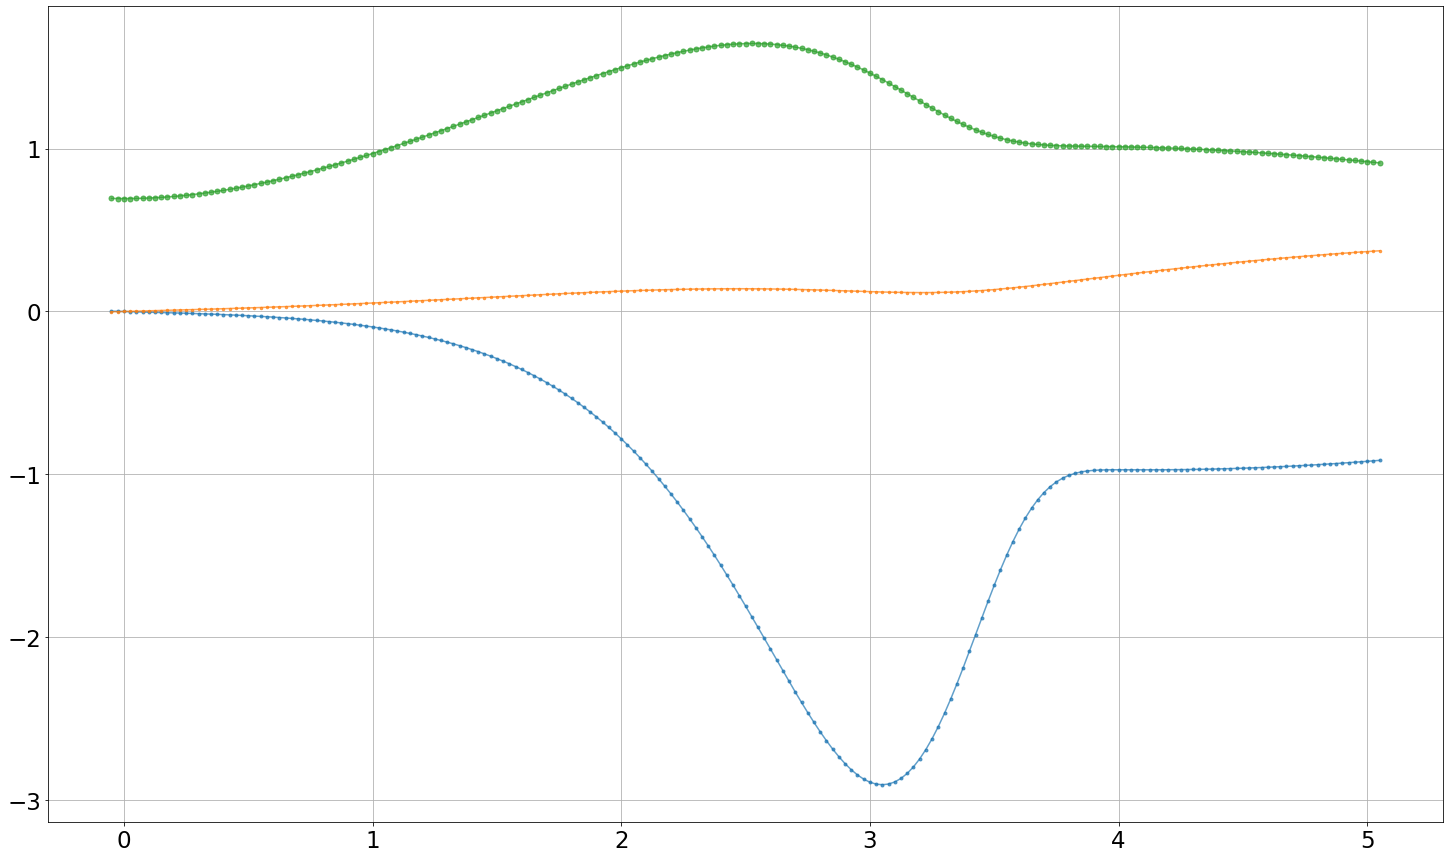

In [74]:
# plot of the initial conditions
for n in range(0,1):
    for i in range(1,2):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.-',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.',alpha=0.7,markersize=10,label="field 2")


#plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-100000, 10])

In [75]:
def m1_solution_PsiPlus(R,T,A,ds):
    B = 1
    J = R-T
    K = np.exp(4*ds**2*R*T)
    L = R+T
    return( A*B*(J-J*K-4*ds**2*L**2*R)/(R*(A*B*(J*K+L)+2*np.exp(ds**2*L**2)*R)))

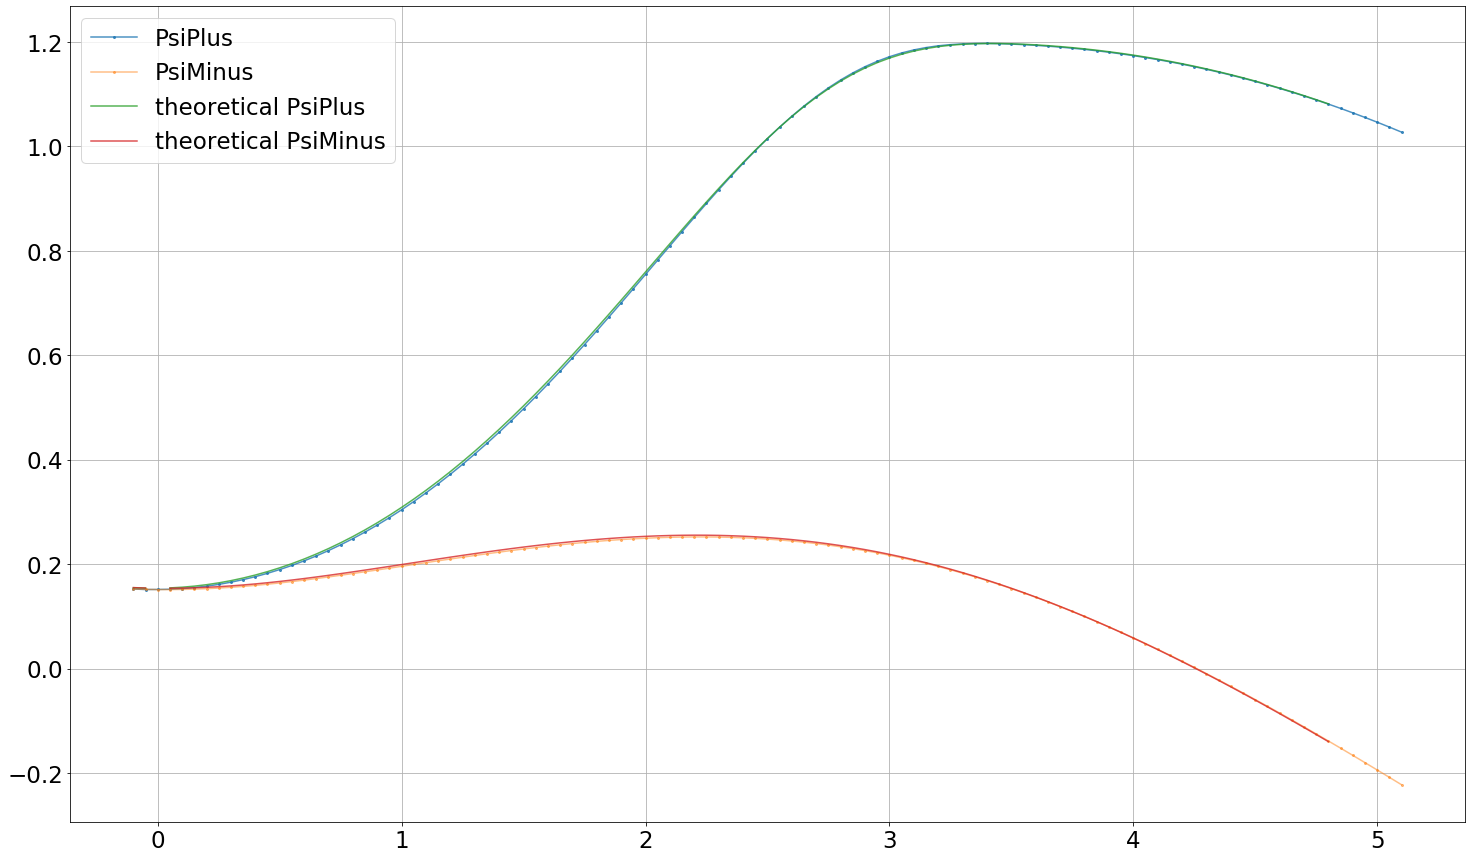

In [77]:
for n in [0]:
    for i in range(0,1):        
        for j in range(200,201):
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],'.-',alpha=0.8,markersize=4,label="PsiPlus")
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],'.-',alpha=0.5,markersize=4,label="PsiMinus")
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],'.-',alpha=0.75,markersize=4,label="Psi")
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            #plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_Psi(big_DF[n][i][j]['x'],times[j],1,1,1/5,dmax),alpha=0.8,label='theoretical Psi')
            plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],1,1,1/5,dmax),alpha=0.8,label='theoretical PsiPlus')
            plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_m1_charvar_solution_PsiMinus(big_DF[n][i][j]['x'],times[j],1,1,1/5,dmax),alpha=0.8,label='theoretical PsiMinus')
            #plt.plot(big_DF[n][i][j]['x'],m1_solution_PsiPlus(big_DF[n][i][j]['x'],times[j],1,1),alpha=0.8,label='theoretical Psi')
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,dmax),'+',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([0,0.5])
#plt.ylim([ 0.08,0.1] )
#plt.yscale('log')
plt.legend()


## Convergence test and out put

### Self convergence test

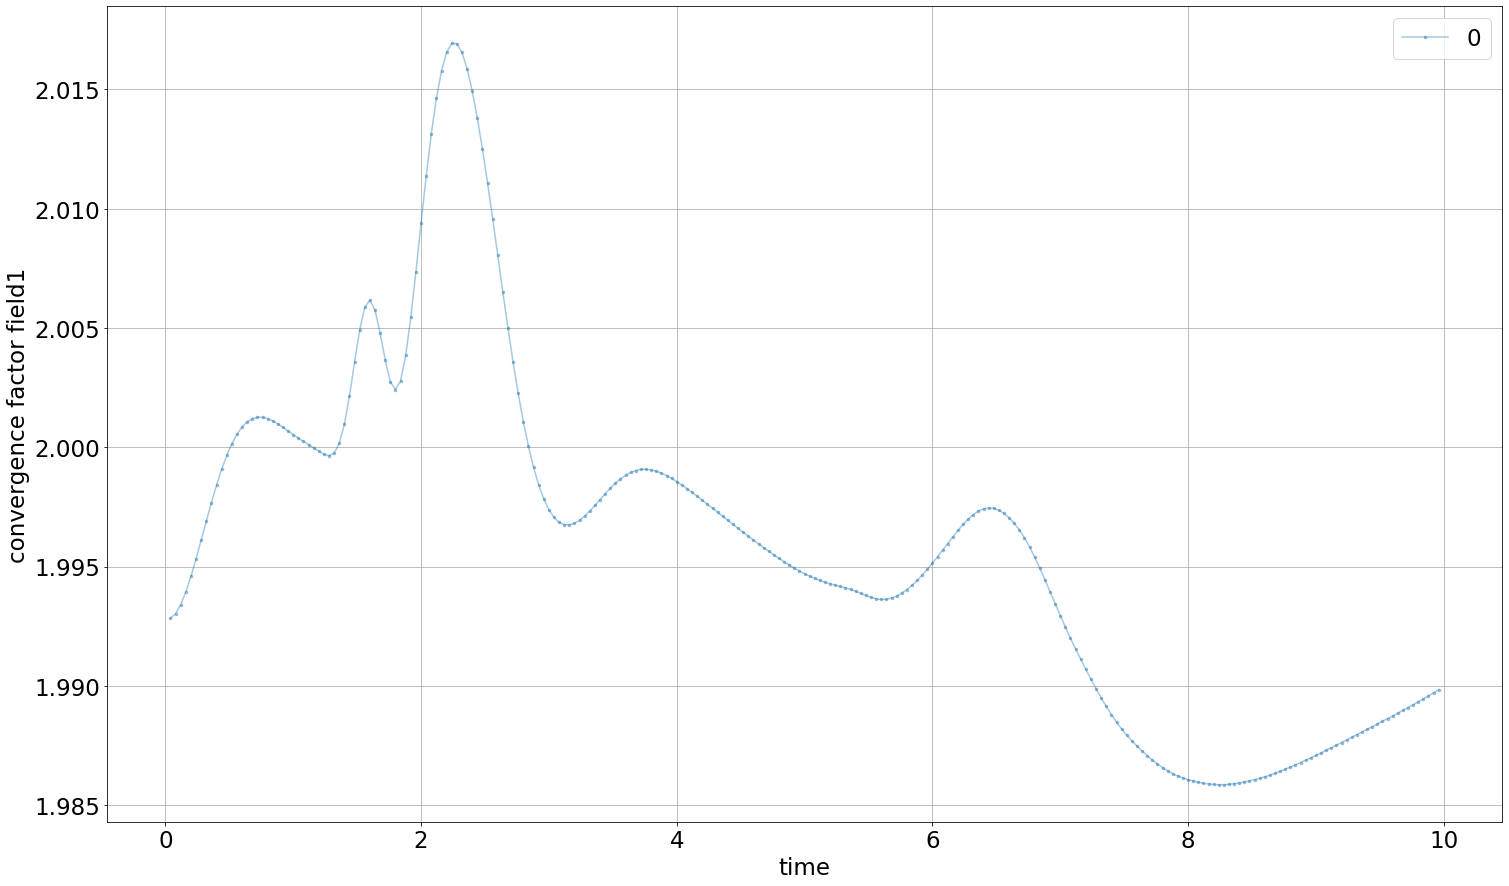

In [78]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field1"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4,label=n)
#plt.xlim(0,30)
#plt.ylim(1.5,2.5)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

### Pointwise convergence
The function self_conv_test compute a difference vector between the resolution 0 and 1, and 4 times a difference vector between resolution 1 and 2. The two vector should theoretically coincide.

In [140]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    #plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
#plt.ylabel('pointwise convergence factor')
#plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

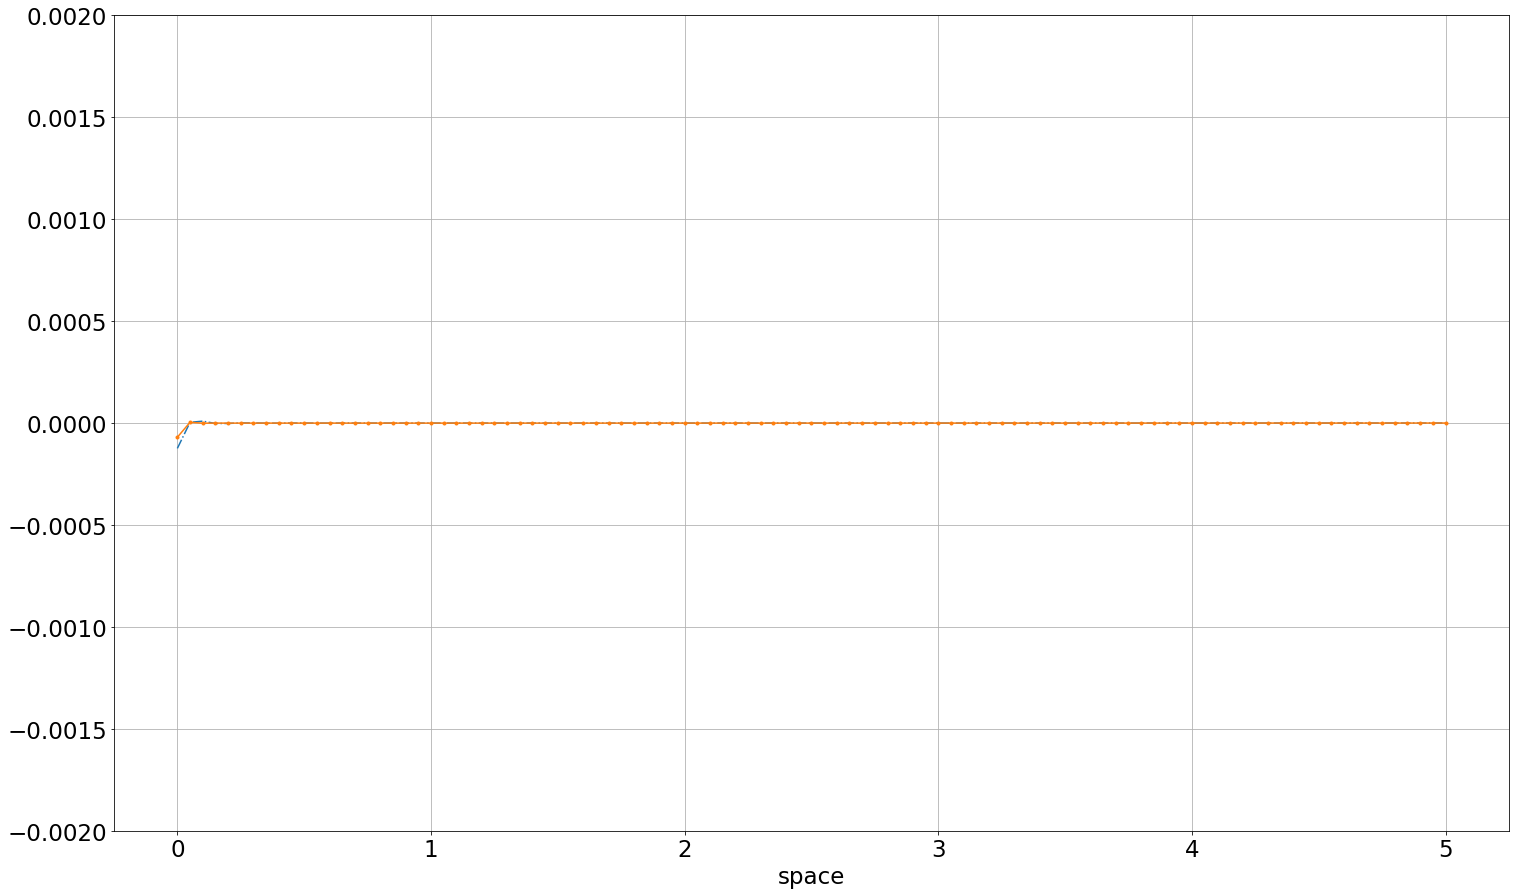

In [31]:
ylim_inf = -0.002
ylim_sup = 0.002
plot_pw_convergence(big_DF,gl,gr,self_conv_test_vect_pw,model,data,field,epsilon,n_ind,dx,number_steps,ylim_inf,ylim_sup)

## Evolutions' videos of the functions

### Animation of a singular field

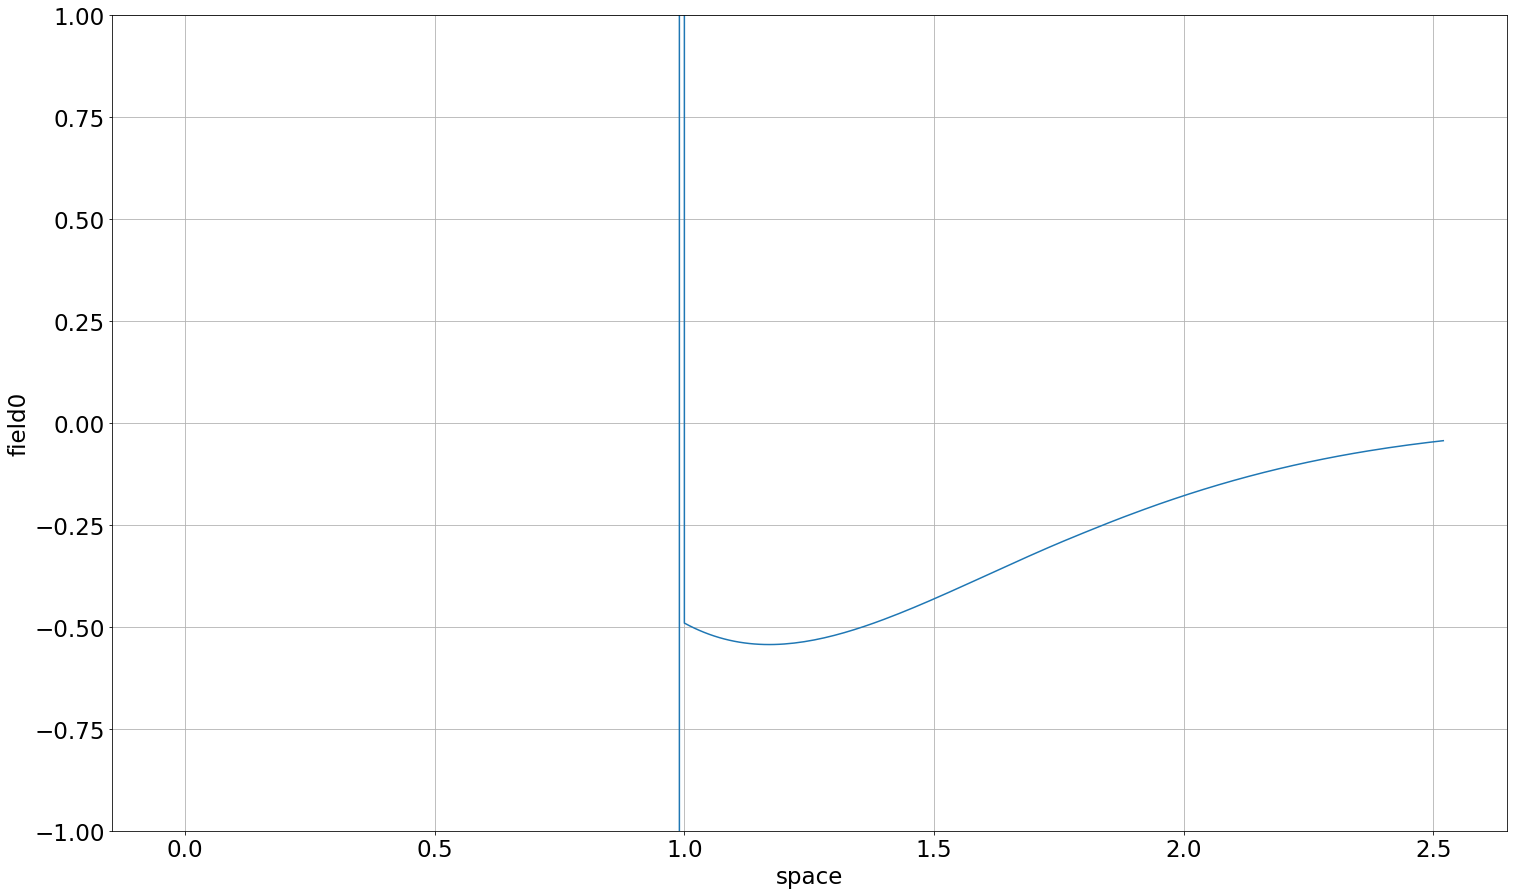

In [9]:
ylim_inf = -1
ylim_sup = 1
field_number = 0
h_ind = 0
big_DF_ind = 0
animate_one_field(field_number,h_ind,big_DF_ind,model,data,big_DF,ylim_inf,ylim_sup,number_steps)

### Animation of multiple fields

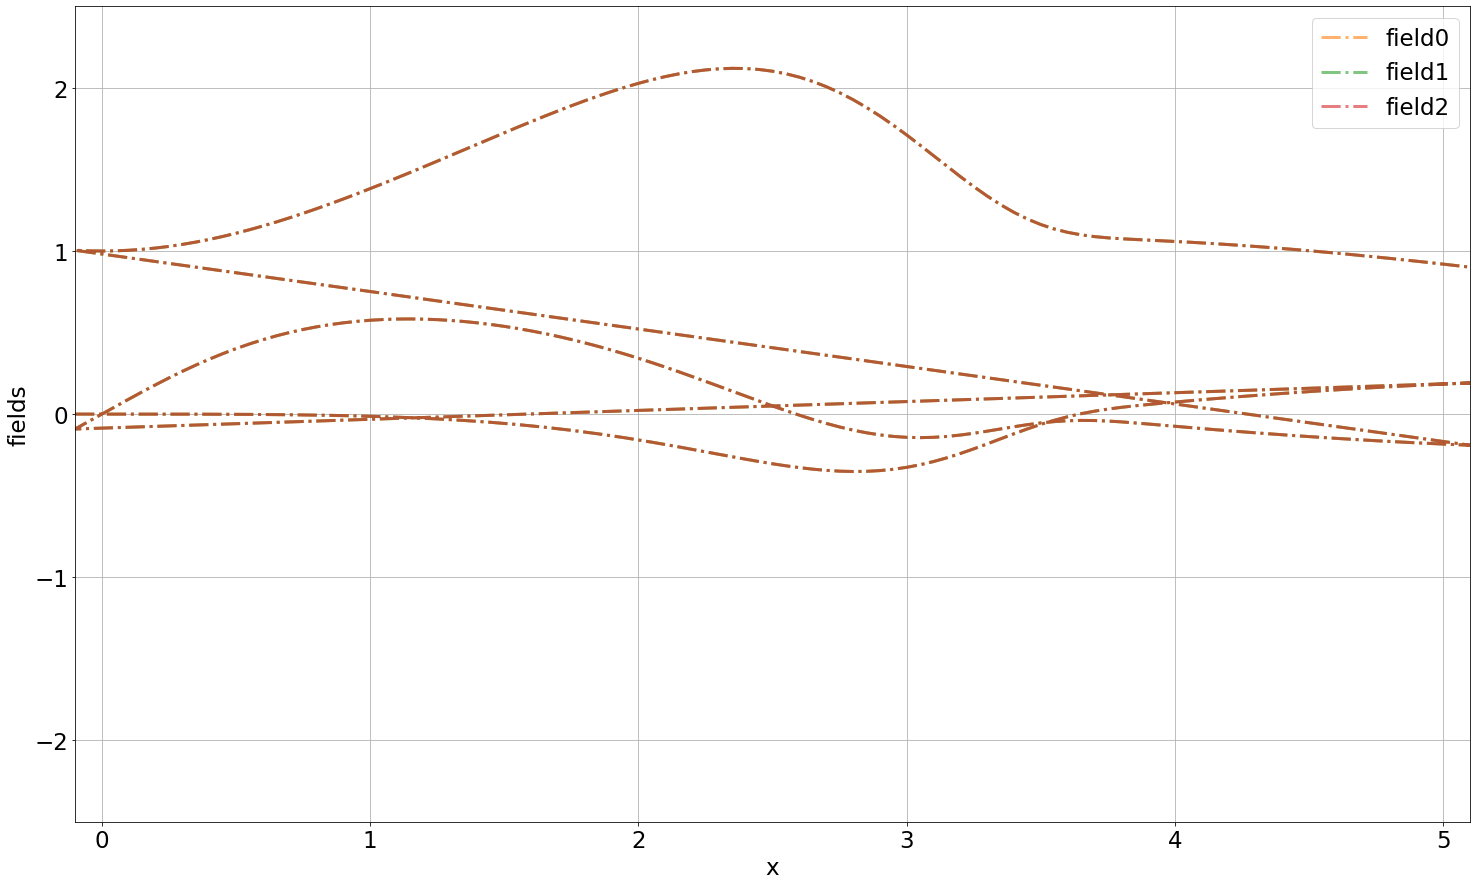

In [34]:
fields_to_print = ["field0","field1","field2"]
ylim_inf = -2.5
ylim_sup = 2.5
h_ind = 0
big_DF_ind = 0
animate_multiple_fields(big_DF,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,ylim_inf,ylim_sup,number_steps,domain_lenght)

### Theoretical comparisons

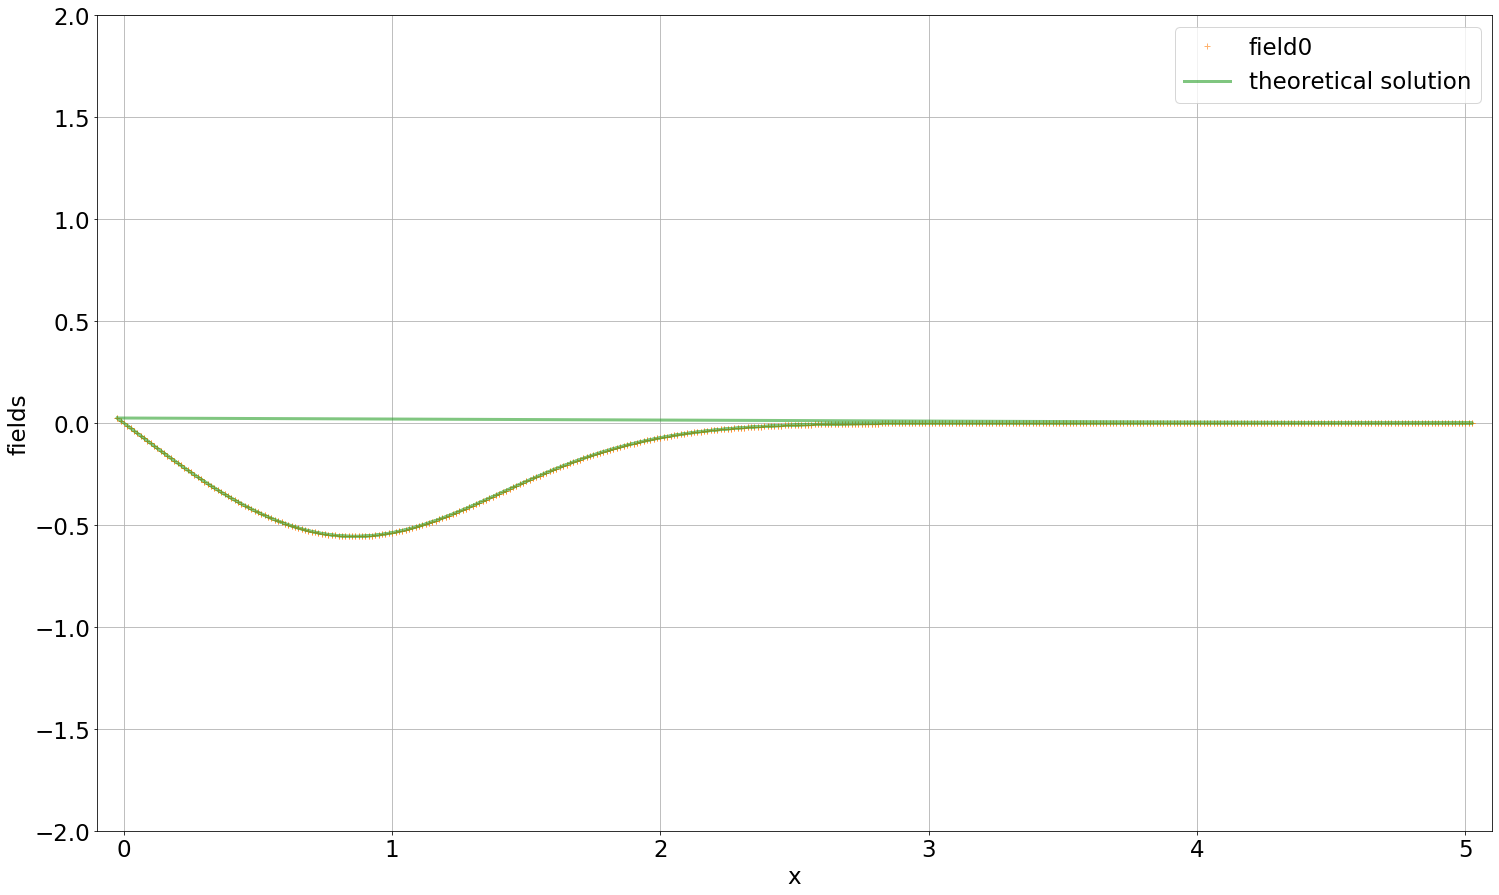

In [11]:
fields_to_print = ["field0","theoretical"]
h_ind = 2
big_DF_ind = 0
ylim_inf = -2
ylim_sup = 2
theoretical_comparison(big_DF,m1_solution_PsiPlus,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector)

## Plot of the power law scaling for the CSS and DSS models

In [36]:
# we compute the maximums over all times for each run (they have different initial amplitude)
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(int(len(names)/4)):
    amplitudes_vector.append(float(names[4*n][38:46]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816- amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [2.313328, 2.316648, 2.319366, 2.321592, 2.323414, 2.324906, 2.326127, 2.327127, 2.327946, 2.328616, 2.329165, 2.329614, 2.329982, 2.330283, 2.33053, 2.330732, 2.330897, 2.331032, 2.331143, 2.331234, 2.331308]
21
maximum [13.6006, 14.0252, 14.3759, 14.6717, 14.9126, 17.3391, 22.4286, 27.7882, 33.2415, 38.6043, 43.7242, 48.4625, 52.7406, 56.5029, 59.7526, 62.1453, 64.4231, 66.3001, 67.8406, 69.0929, 70.0984]
intercept: 0.5917041016069651 angular coefficient [0.49418668]


Text(0, 0.5, 'maximum PI overall times')

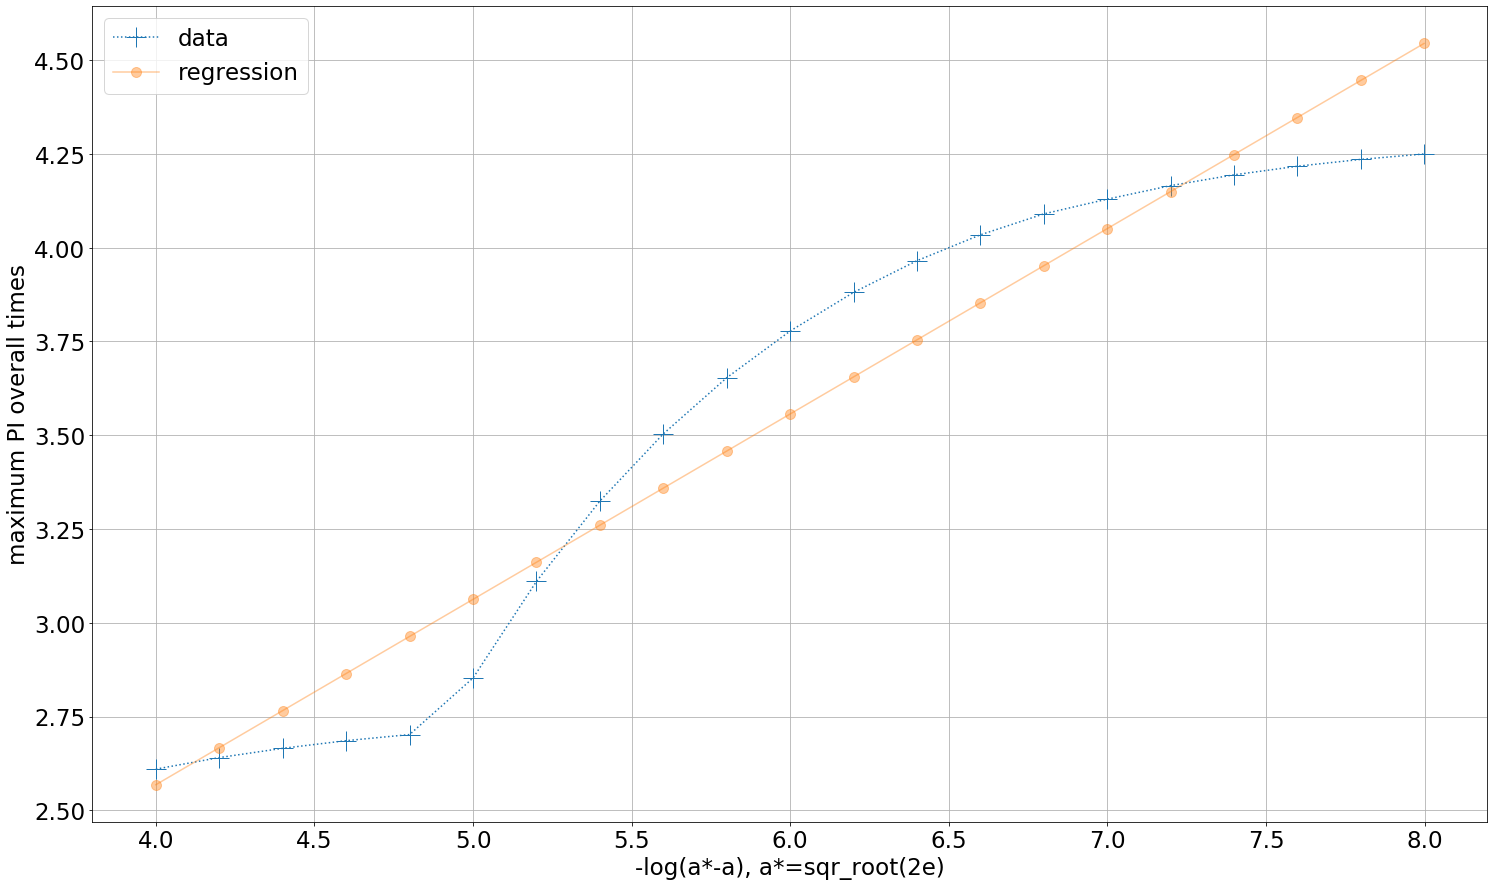

In [37]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

### Production of the amplitudes to analyze

In [53]:
amplitudes_vector_creator(4,8.5,2.3316439816,0.2)


array([2.31332834, 2.3166484 , 2.31936664, 2.32159215, 2.32341423,
       2.32490603, 2.32612742, 2.3271274 , 2.32794612, 2.32861643,
       2.32916523, 2.32961455, 2.32998242, 2.33028361, 2.33053021,
       2.3307321 , 2.3308974 , 2.33103273, 2.33114353, 2.33123425,
       2.33130852, 2.33136933, 2.33141911])

In [14]:
 2.327946 needs 0.05 (0.005???!),  2.330732 needs 0.0025, 2.332369 needs 0.00125

9.326575926388497

In [52]:
amplitudes_vector_creator(4.1,8.6,2.3316439816,0.2)

array([2.31507131, 2.31807542, 2.32053499, 2.3225487 , 2.3241974 ,
       2.32554724, 2.32665239, 2.32755721, 2.32829802, 2.32890454,
       2.32940111, 2.32980768, 2.33014054, 2.33041307, 2.3306362 ,
       2.33081888, 2.33096844, 2.3310909 , 2.33119115, 2.33127324,
       2.33134044, 2.33139546, 2.33144051])